## Практическое задание 4: Линейные модели, часть 1: Регрессия

### Важно! О формате сдачи

* Все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования.</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода)</font>, необходимо прописать ответ в ячейку (код или markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" итд</font>, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст

Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
При выполнении данного задания необходимо последовательно запустить все ячейки ноутбука и ответить на $11$ вопросов. Ответы на вопросы будут проверены в рамках кросс-ревью. Всего за ответы на вопросы можно получить $20$ баллов.

### <font color=orange>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 30 минут </font>*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-23-24/blob/main/tutorials/Туториал%20по%20установке%20рабочего%20окружения%20в%20Python%20для%20решения%20задач.pdf)


In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
# Устанавливаем урезанную версию requeirements.txt для ускорения установки
# Если будут всплывать ошибки о несовместимости библиотек, то ничего страшного
# На это задание они не влияют

! gdown 1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
! pip install -r requirements_small.txt

Downloading...
From: https://drive.google.com/uc?id=1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
To: /workspaces/ML_1/task4/requirements_small.txt
100%|██████████████████████████████████████████| 374/374 [00:00<00:00, 2.77MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.3 MB/s eta 0:00:0000:010:01m
  

In [2]:
import catboost
assert(catboost.__version__ == '1.2.1')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 1. Линейная регрессия

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

Для обучения линейной регрессии, равно как и для обучения остальных простых моделей (линейные модели, решающие деревья, knn и т.д.) отлично подходит библиотека scikit-learn (sklearn): в ней очень понятный и простой интерфейс.

Однако для обучения более сложных моделей вроде бустинга и нейронных сетей всё же нужно пользоваться специализированными библиотеками: XGBoost, LightGBM, CatBoost и пр. для градиентного бустинга над деревьями, PyTorch, Tensorflow и пр. для нейронных сетей.

Так как мы будем обучать линейную регрессию, нам подойдет реализация из sklearn. В sklearn есть несколько классов, реализующих линейную регрессию. Основные это:

- Ridge — линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией
- Lasso — линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией

Также есть SVR, ElasticNet  и пр., но не будем сегодня о них

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Рассмотрим, модельные данные для задачи регрессии. Пусть $x$ будет обычным числом из равномерного распределения, а $y = 0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim \mathcal{N}(0, 0.01)$.

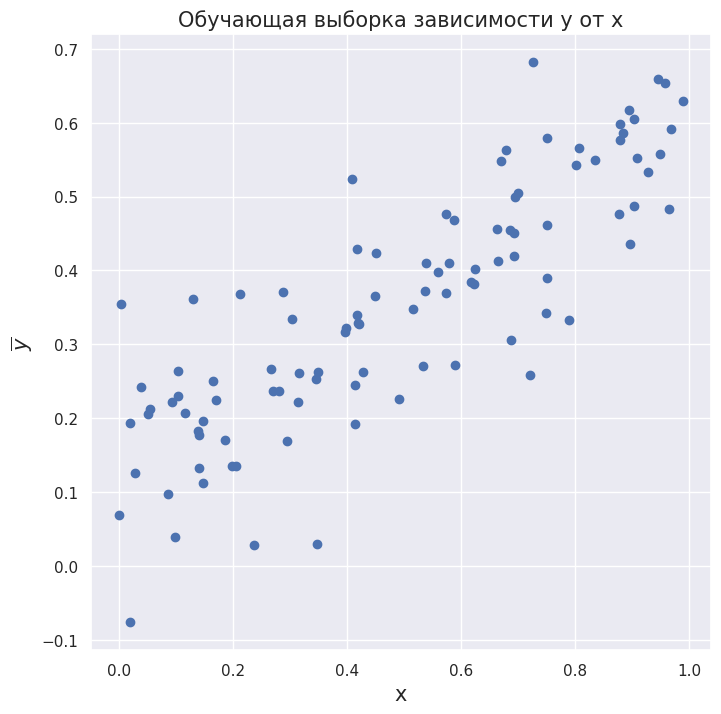

In [4]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

Обучим линейную регрессию, и посмотрим как регуляризация влияет на качество модели. В реализации библиотеки sklearn коэффициент регуляризации задаётся параметром alpha

In [5]:
from sklearn.linear_model import Ridge

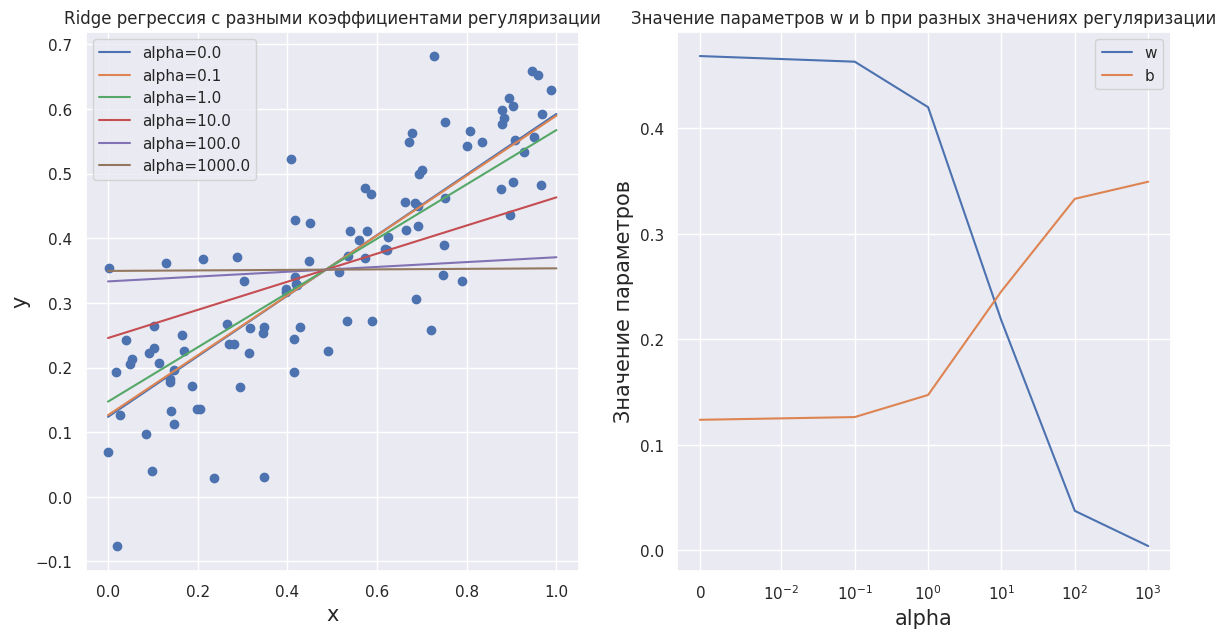

In [6]:
x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].scatter(X, Y)

w = []
b = []

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X[:, None], Y)
    pred = reg.predict(x_axis[:, None])
    w.append(reg.coef_[0])
    b.append(reg.intercept_)
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")
axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()
plt.show()

### **Вопрос 1** (1 балл)

Как зависят параметры модели от константы регуляризации? А качество?

Качество падает с ростом коэффициента регуляризации. При этом, веса модели стремятся к нулю

### **Вопрос 2** (1 балл)

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции и увиденные картинки.

Коэффициент b не регуляризуется, потому что он контролирует положение модели относительно оси ординат и не влияет на сложность или наклон модели.

------

Казалось бы, зачем нам эта глупая регуляризация?!

Давайте рассмотрим ещё один модельный пример. Представим, что кто-то добавил в данные к переменной $x$ её же умноженную на $2$. То есть, теперь у нас два признака $x_1$ и $x_2 = 2 \cdot x_1$. Тогда, $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{4} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. Это может привести к тому, что без регуляризации мы рискуем выучить очень большие веса!

In [7]:
np.random.seed(1)
X2 = np.hstack((X[:, None], 2 * X[:, None]))
Y2 = X2[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X2, Y2)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.1006220738265918 	w2: 0.20124414765318363


Коэффициенты адекватные, хотя и не похожи на изначальную зависимость. Но что, если $x_2$ будет равняться $3 \cdot x_1$?

In [8]:
np.random.seed(1)
X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 20443435586638.348 	w2: -6814478528879.28


Тут вот уже не повезло. Коэффициенты случайно выучились неадекватно большими. Создадим обучающую выборку из того же распределения и посмотрим на качество

In [9]:
np.random.seed(2)
X3_test = np.random.uniform(0, 1, 100)
X3_test = np.hstack((X3_test[:, None], 3 * X3_test[:, None]))
Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y3_test_pred = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))

MSE loss: 0.0209


Вроде бы неплохое, но что если мы добавим ко второму признаку одного из объектов небольшой шум?

In [10]:
X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])

MSE loss: 4641.705892708396
Предсказание для первого объекта с шумом:  -681.02734375
Предсказание для первого объекта без шума:  0.419921875


Как видим, даже небольшое изменение в данных, приводит к резкому падению качества.


### **Вопрос 3** (2 балла)
Рассмотрите больше примеров с двумя признаками $x_1$ и $x_2$, где $x_2$ линейно зависит от $x_1$. Убедитесь, что линейная модель без регуляризации крайне неустойчива.

In [11]:
np.random.seed(1)
X4 = np.hstack((X[:, None], 4 * X[:, None]))
Y4 = X4[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X4, Y4)
print("w1:", reg.coef_[0], " w2:", reg.coef_[1])

np.random.seed(2)
X4_test = np.random.uniform(0, 1, 100)
X4_test = np.hstack((X4_test[:, None], 4 * X4_test[:, None]))
Y4_test = X4_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y4_test_pred = np.sum(reg.coef_[None] * X4_test + reg.intercept_, axis=1)
print("MSE loss:",  np.mean((Y4_test_pred - Y4_test) ** 2))
X4_test[0, 1] = X4_test[0, 1] + 1e-10
Y4_test_pred_noisy = np.sum(reg.coef_[None] * X4_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y4_test_pred_noisy - Y4_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y4_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y4_test_pred[0])

np.random.seed(1)
X5 = np.hstack((X[:, None], 15 * X[:, None]))
Y5 = X5[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X5, Y5)
print("w1:", reg.coef_[0], " w2:", reg.coef_[1])

np.random.seed(2)
X5_test = np.random.uniform(0, 1, 100)
X5_test = np.hstack((X5_test[:, None], 15 * X5_test[:, None]))
Y5_test = X5_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y5_test_pred = np.sum(reg.coef_[None] * X5_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y5_test_pred - Y5_test) ** 2))
X5_test[0, 1] = X5_test[0, 1] + 1e-10
Y5_test_pred_noisy = np.sum(reg.coef_[None] * X5_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y5_test_pred_noisy - Y5_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y5_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y5_test_pred[0])



w1: 0.029594727596056407  w2: 0.11837891038422566
MSE loss: 0.022682068466812148
MSE loss: 0.022682068466849233
Предсказание для первого объекта с шумом:  0.42844760716694197
Предсказание для первого объекта без шума:  0.4284476071551041
w1: 85872793339039.98  w2: -5724852889269.298
MSE loss: 0.019206443642681936
MSE loss: 3275.773906159171
Предсказание для первого объекта с шумом:  -572.0703125
Предсказание для первого объекта без шума:  0.4140625


-----

Теперь добавим регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

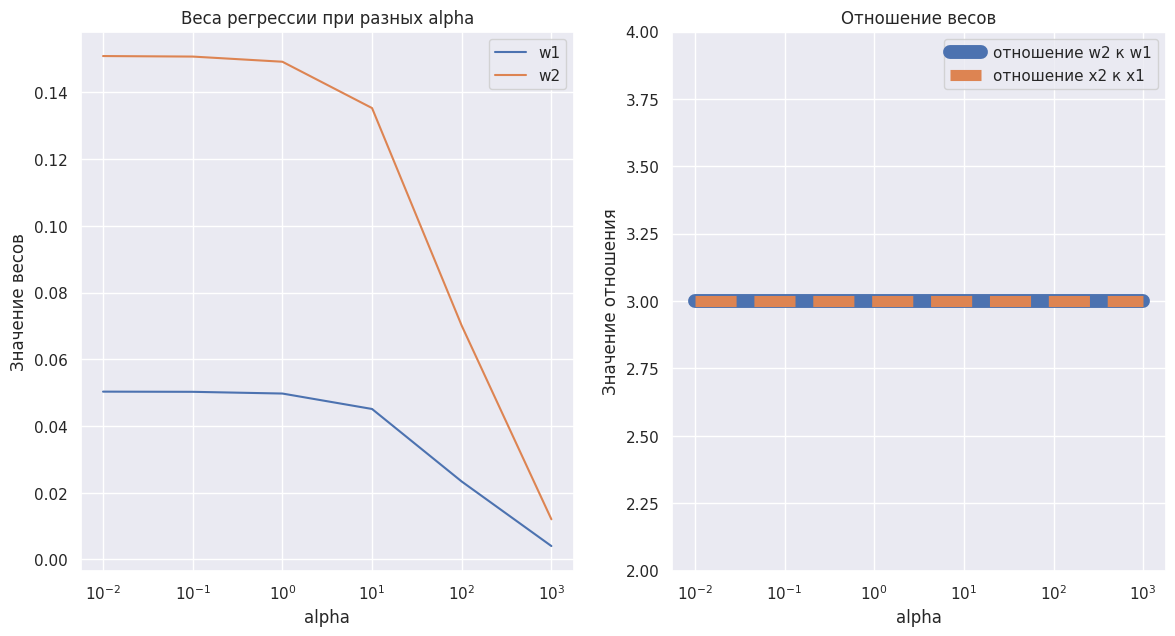

In [12]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### **Вопрос 4** (2 балла)

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

Рассмотрим функцию потерь $L_2$, которая определяется как:

$$
L_2 = \sum_{i=1}^n (y_i - \hat{y}(x_i))^2 + \lambda \sum_{j=1}^d w_j^2
$$

где $y_i$ — истинные значения, $\hat{y}(x_i)$ — предсказанные значения, $w_j$ — веса модели, и $\lambda$ — коэффициент регуляризации.

Дифференцируем $L_2$ по весу $w_j$:

$$
\frac{\partial L_2}{\partial w_j} = -2 \sum_{i=1}^n (y_i - \hat{y}(x_i)) \frac{\partial \hat{y}(x_i)}{\partial w_j} + 2 \lambda w_j
$$

Предполагая, что $\frac{\partial \hat{y}(x_i)}{\partial w_j} = x_{ij}$, получаем:

$$
\frac{\partial L_2}{\partial w_j} = -2 \sum_{i=1}^n (y_i - \hat{y}(x_i)) x_{ij} + 2 \lambda w_j
$$

Упрощая, получаем:

$$
\frac{\partial L_2}{\partial w_j} = 2 \lambda w_j - 2 \sum_{i=1}^n (y_i - \hat{y}(x_i)) x_{ij}
$$

Чтобы найти экстремум, необходимо приравнять производную к нулю:

$$
2 \lambda w_j - 2 \sum_{i=1}^n (y_i - \hat{y}(x_i)) x_{ij} = 0
$$

$$
\lambda w_j = \sum_{i=1}^n (y_i - \hat{y}(x_i)) x_{ij}
$$

Теперь мы можем выразить отношение весов $w_j$ и $w_k$:

$$
\frac{w_j}{w_k} = \frac{\sum_{i=1}^n (y_i - \hat{y}(x_i)) x_{ij}}{\sum_{i=1}^n (y_i - \hat{y}(x_i)) x_{ik}}
$$

Если предположить, что $x_{ij}$ пропорционально $x_{ik}$, то есть $x_{ij} = \alpha x_{ik}$, тогда:

$$
\frac{w_j}{w_k} = \frac{\sum_{i=1}^n (y_i - \hat{y}(x_i)) \alpha x_{ik}}{\sum_{i=1}^n (y_i - \hat{y}(x_i)) x_{ik}} = \alpha
$$

Таким образом, отношение весов $w_j$ и $w_k$ будет равно коэффициенту пропорциональности $\alpha$.


-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### **Вопрос 5** (2 балла)

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

Определим функцию потерь $L_1$ как:

$$
L_1 = \sum_{i=1}^n (y_i - y(x_i))^2 + \lambda \sum_{j=1}^d |w_j|
$$

где $y_i$ — это истинные значения, $y(x_i)$ — предсказанные значения, $w_j$ — весовые коэффициенты модели, а $\lambda$ — параметр регуляризации. 

Вычислим производную $L_1$ по весу $w_j$:

$$
\frac{\partial L_1}{\partial w_j} = -2 \sum_{i=1}^n (y_i - y(x_i)) \frac{\partial y(x_i)}{\partial w_j} + \lambda \frac{\partial |w_j|}{\partial w_j}
$$

Учитывая, что $\frac{\partial y(x_i)}{\partial w_j} = x_{ij}$, получаем:

$$
\frac{\partial L_1}{\partial w_j} = -2 \sum_{i=1}^n (y_i - y(x_i)) x_{ij} + \lambda \frac{\partial |w_j|}{\partial w_j}
$$

Теперь продемонстрируем, как происходит разреживание весов:

$$
\frac{\partial L_1}{\partial w_j} = -2 \sum_{i=1}^n (y_i - y(x_i)) x_{ij} + \lambda \frac{\partial |w_j|}{\partial w_j} = 0
$$

$$
\frac{\partial L_1}{\partial w_j} = -2 \sum_{i=1}^n (y_i - y(x_i)) x_{ij} + \lambda \cdot \text{sign}(w_j) = 0
$$

Рассмотрим два случая:

1) Если $w_j > 0$:

$$
-2 \sum_{i=1}^n (y_i - y(x_i)) x_{ij} + \lambda = 0
$$

$$
\lambda = 2 \sum_{i=1}^n (y_i - y(x_i)) x_{ij} > 0
$$

2) Если $w_j < 0$:

$$
-2 \sum_{i=1}^n (y_i - y(x_i)) x_{ij} - \lambda = 0
$$

$$
\lambda = -2 \sum_{i=1}^n (y_i - y(x_i)) x_{ij} < 0
$$

Таким образом, если $w_j > 0$, тогда $\lambda > 0$, и если $w_j < 0$, тогда $\lambda < 0$. Следовательно, веса меньше нуля будут обнуляться, а веса больше нуля могут увеличиваться.


-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [13]:
from sklearn.linear_model import Lasso

In [14]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.03950662786303303

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.15488377352619098

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1664214880925068

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1675752595491384

Веса, при alpha = 0.00001
w1: 0.4261538129756522 	w2: 0.025639365702917725



### **Вопрос 6** (2 балла)

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

**Подсказка** Обратите внимание на то, каким странным получился вес $w_2$

**Ваш ответ здесь**

In [15]:
reg = Lasso(alpha=0.00001, max_iter=10000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 0.00001
w1: 0.0 	w2: 0.1676906366948017



-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### **Вопрос 7** (2 балла)

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

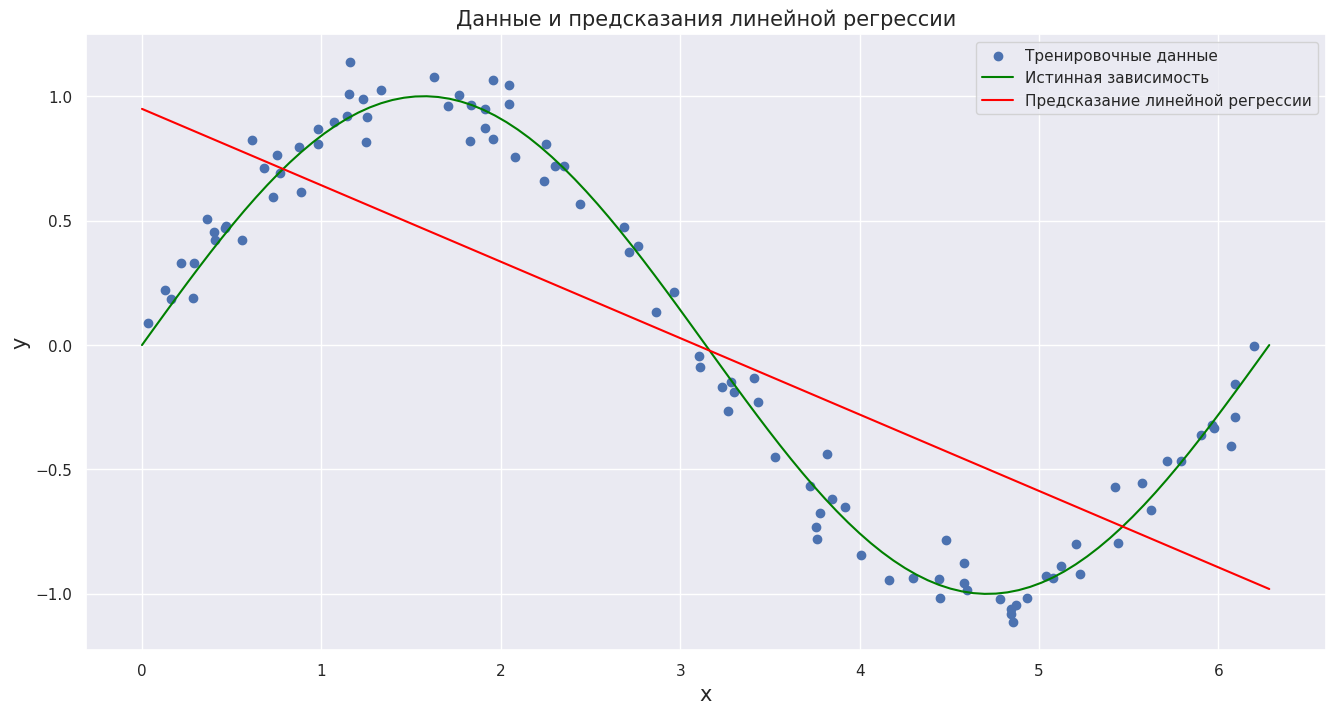

In [16]:
np.random.seed(42)

# Генерируем данные
X = np.random.uniform(0, 1, 100) * 2 * np.pi  # Масштабируем X до [0, 2π]
Y = np.sin(X) + np.random.randn(100) * 0.1  # Создаем Y как sin(X) с шумом

# Подготавливаем данные для линейной регрессии (добавляем новое измерение к X)
X_reshaped = X[:, np.newaxis]

# Инициализируем и обучаем модель линейной регрессии
reg = Ridge(alpha=0.0001)
reg.fit(X_reshaped, Y)

# Генерируем предсказания модели на более плотной сетке данных
X_test = np.linspace(0, 2 * np.pi, 100)
Y_pred = reg.predict(X_test[:, np.newaxis])

# Визуализируем результаты
plt.figure(figsize=(16, 8))
plt.scatter(X, Y, label="Тренировочные данные")
plt.plot(X_test, np.sin(X_test), label="Истинная зависимость", color='green')
plt.plot(X_test, Y_pred, label="Предсказание линейной регрессии", color='red')
plt.title("Данные и предсказания линейной регрессии", size=15)
plt.xlabel("x", size=15)
plt.ylabel("y", size=15)
plt.legend()
plt.show()


-------------

Попробуем обучить линейную регрессию c $l_1$ регуляризацией на специальном датасете из sklearn

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

Взглянем немножко на данные. Выведем средние значения каждого признака

In [18]:
with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print(X_train.mean(axis=0))

[ 3.871  28.668  5.438  1.097  1423.264  3.116  35.621 -119.558]


Нетрудно видеть, что масштаб у разных признаков сильно отличается. Это может приводить к разным неприятным эффектам. Подробнее эту проблему мы разберём в следующем задании.

In [19]:
from sklearn.preprocessing import StandardScaler

### **Вопрос 8** (2 балла)

Отмасштабируйте данные при помощи класса StandardScaler. Выведите средние значения и дисперсии признаков на обучающей и тестовой выборках.

**Замечание:** Результат положите в переменные X_train_scaled и X_test_scaled , чтобы последующий код был рабочим

In [20]:
#Ваш ответ
scaler = StandardScaler()
print("Before scaling:")
print("Train Mean: ", X_train.mean(axis=0))
print("Train Var: ", X_train.var(axis=0))
print("Test Mean: ", X_test.mean(axis=0))
print("Test Var: ", X_test.var(axis=0))
print()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("After scaling:")
print("Train Mean: ", X_train_scaled.mean(axis=0))
print("Train Var: ", X_train_scaled.var(axis=0))
print("Test Mean: ", X_test_scaled.mean(axis=0))
print("Test Var: ", X_test_scaled.var(axis=0))


Before scaling:
Train Mean:  [ 3.87087301e+00  2.86684662e+01  5.43775427e+00  1.09683623e+00
  1.42326447e+03  3.11564190e+00  3.56214957e+01 -1.19558153e+02]
Train Var:  [3.56388989e+00 1.59063535e+02 5.56647861e+00 2.11257438e-01
 1.29782030e+06 1.50100463e+02 4.54958109e+00 4.00005886e+00]
Test Mean:  [ 3.87019966e+00  2.85718669e+01  5.40857251e+00  1.09629929e+00
  1.43063873e+03  2.96568610e+00  3.56560481e+01 -1.19596659e+02]
Test Var:  [3.71474890e+00 1.56807174e+02 7.41507426e+00 2.55667840e-01
 1.24640899e+06 9.29917672e+00 4.59038043e+00 4.04530771e+00]

After scaling:
Train Mean:  [-6.41568747e-15  3.04297008e-17  1.19356928e-14 -2.24111673e-16
 -9.92077406e-17 -1.22618655e-15 -3.45598411e-14  2.75281213e-14]
Train Var:  [1. 1. 1. 1. 1. 1. 1. 1.]
Test Mean:  [-0.00035668 -0.00765929 -0.01236862 -0.00116823  0.00647308 -0.01223974
  0.01619917 -0.01925281]
Test Var:  [1.04232987 0.98581472 1.33209427 1.21021935 0.96038642 0.06195302
 1.00896771 1.01131205]


Измерим качество прогнозатора. Будем использовать метрику RMSE.

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
reg = Lasso(alpha=0.5)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.9780


### **Вопрос 9** (1 балл)

В чем плюсы RMSE по сравнению с MSE?

RMSE имеет несколько преимуществ перед MSE, включая более интуитивно понятную интерпретацию ошибок и повышенную чувствительность к аномально большим ошибкам. Это означает, что RMSE обеспечивает лучшее представление о том, насколько эффективно модель прогнозирует данные, акцентируя внимание на значительных промахах. В то время как MSE тоже отражает точность модели, его значения могут быть менее очевидными для понимания и менее реагирующими на аномалии в данных.

### **Вопрос 10** (1 балл)

Насколько удачно измерять качество модели с помощью RMSE с учетом того, что оптимизация линейной регрессии происходит по MSE?

RMSE и MSE тесно связаны, что позволяет использовать любую из этих метрик для оценки модели. Тем не менее, при сравнении различных моделей целесообразнее придерживаться одной и той же метрики для облегчения сопоставления их производительности.

-----

Проанализируем ошибку на обучающей выборке.

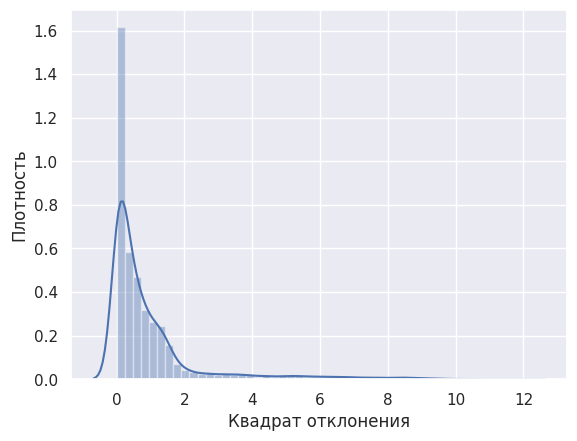

In [23]:
error = (y_train - reg.predict(X_train_scaled)) ** 2
sns.distplot(error)
plt.xlabel("Квадрат отклонения")
plt.ylabel("Плотность")
plt.show()

Как видно, есть несколько объектов, на которых модель ошибается сильно. Давайте посмотрим на качество, если удалить эти объекты из обучающей выборки.

In [24]:
mask = (error < np.quantile(error, 0.99))
reg.fit(X_train_scaled[mask], y_train[mask])
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.9717


Таким образом, можно улучшить качество линейной регрессии, если удалить из обучающей выборки выбросы. В данном примере, качество улучшилось не так сильно, но бывают ситуации, когда чистка обучающей выборки по ошибке, приводит к сильному улучшению качества.

Обратим внимание на веса модели. Почти все из них занулились! Это большое преимущество, так как разреживание весов позволяет отбирать нужные признаки, делая модель более лёгкой.

In [25]:
reg.coef_

array([ 0.30658523,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

А теперь обучим с $l_2$ регуляризацией.

In [26]:
reg = Ridge(alpha=0.5)
reg.fit(X_train_scaled, y_train)
print(reg.coef_)

[ 0.82540051  0.12701227 -0.24066504  0.27101941 -0.00317096 -0.04117445
 -0.87312407 -0.84556157]


Как видим, веса не разрежены, хотя и есть очень маленькие значения

### **Вопрос 11** (2 балла)

Приведите пример, когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак?

**Ваш ответ здесь**

In [27]:
np.random.seed(42)

# Генерируем искусственные данные
x1 = np.random.randn(100)
x2 = np.random.randn(100) * 1e-6  # делаем второй признак почти незначимым
x3 = np.ones(100)  # свободный член
X = np.hstack((x1[:, None], x2[:, None], x3[:, None]))

# Целевая переменная
y = 4 * x1 + np.random.randn(100)  # x2 не используем, поэтому он не влияет на y

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создаем объект линейной регрессии с l2 регуляризацией и большим коэффициентом регуляризации
reg = Ridge(alpha=1e10)

# Обучаем модель
reg.fit(X_train, y_train)

# Прогнозируем значения для тестовой выборки
y_pred = reg.predict(X_test)

# Вычисляем RMSE
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))

# Выводим веса модели
for i, coef in enumerate(reg.coef_):
    print(f"w_{i+1} = {coef}")


RMSE:  4.41424068764134
w_1 = 2.554319421975616e-08
w_2 = -2.3352803697032434e-15
w_3 = 0.0


------

При обучении мы заранее не знаем, какое значение параметра регуляризации даст наилучшие результаты. Подобрать оптимальные параметры можно с помощью кросс-валидации. В sklearn есть несколько классов со встроенной кросс-валидацией

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Воспользуемся классом GridSearch для перебора параметров по сетке.

* Для линейных регрессий перебирается параметр $\alpha$ - сила регуляризации. Обычно важнее перебирать порядок этого параметра, а не точное его значение. В силу этого сетку перебора будет удобно сделать через функцию np.logspace, например np.logspace(-3, 3, 10).

### Вопрос 12 (2 балла)

Воспользуйтесь классом [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подберите константы регуляризации для Lasso и Ridge регрессий. Измерьте качество обученных моделей. Сетка перебора должна быть логарифмической, из хотя бы 10 значений


**Подсказка:**
* Пример, как можно перебирать параметры в GridSearch у вложенных [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) можно [найти вот тут](https://www.kaggle.com/code/ilnazsalimov/gridsearch-with-pipeline)
* Обратите внимание, что сейчас мы сразу заносим масштабирование в Pipeline - чтобы иметь возможность сразу вызываться от оригинальных X_train, а также чтобы не было утечки данных при использовании GridSearch
* В GridSearch в качестве скоринговой функции можно подавать строковое описание функции из sklearn, которое [можно посмотреть вот тут](https://scikit-learn.org/stable/modules/model_evaluation.html), а также саму скоринговую функцию из sklearn или собственную функцию, сделанную [через make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer)

**Замечание:** Итоговое качество должно быть не больше 0.73 RMSE.

In [35]:
model_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Lasso())
])

model_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Ridge())
])

lasso_cv = GridSearchCV(
    model_lasso,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid = {"regr__alpha": np.logspace(-3, -3, 10)}
)

ridge_cv = GridSearchCV(
    model_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid = {"regr__alpha": np.logspace(-3, -3, 10)}
)

# Your code: фитим модели и измеряем качество на тесте
# Можно вызывать predict прямо от обученных lasso_cv и ridge_cv
lasso_cv.fit(X_train_scaled, y_train)
# y_pred_l = lasso_cv.predict(X_test_scaled)
# ridge_cv.fit(X_train_scaled, y_train)
# y_pred_r = ridge_cv.predict(X_test_scaled)
# print("Lasso RMSE = %.4f" % mean_squared_error(y_test, y_pred_l, squared=False))
# print("Ridge RMSE = %.4f" % mean_squared_error(y_test, y_pred_r, squared=False))



ValueError: Found input variables with inconsistent numbers of samples: [14448, 80]

Убедимся, что Lasso всё ещё зануляет признаки (скорее всего модель Lasso занулила хотя бы один).

In [36]:
lasso_cv.best_estimator_.named_steps["regr"].coef_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
